# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [87]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper


In [88]:
import tomotopy as tp
import little_mallet_wrapper
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn
import glob
from pathlib import Path


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [89]:
# Q2 (code)

# Load the datasets
sanders_tweets = pd.read_csv('sanders_tweets.csv')
trump_tweets = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)

# Display the first few rows of the combined dataset
print(combined_tweets)


               Username              TweetId  \
0            SenSanders  1351670845639421952   
1            SenSanders  1351259762722279424   
2            SenSanders  1351242822293319680   
3            SenSanders  1350885541911400448   
4            SenSanders  1349880150041780224   
...                 ...                  ...   
30366  @realDonaldTrump  1346912780700577792   
30367  @realDonaldTrump  1346928882595885058   
30368  @realDonaldTrump  1347334804052844550   
30369  @realDonaldTrump  1347555316863553542   
30370  @realDonaldTrump  1347569870578266115   

                                      Title  \
0            SenSanders_1351670845639421952   
1            SenSanders_1351259762722279424   
2            SenSanders_1351242822293319680   
3            SenSanders_1350885541911400448   
4            SenSanders_1349880150041780224   
...                                     ...   
30366  @realDonaldTrump_1346912780700577792   
30367  @realDonaldTrump_1346928882595885058   


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [90]:
# Importing necessary libraries
import re
import string
from nltk.corpus import stopwords
import pandas as pd
from pathlib import Path
import little_mallet_wrapper

# Define a function to clean the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', text, flags=re.MULTILINE)
    return text

# Initialize lists
training_data = []
original_texts = []
titles = []

# Iterate through each tweet, clean the text, and add it to the lists
for index, row in combined_tweets.iterrows():
    text = preprocess_text(row['Content'])
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)
    original_texts.append(row['Content'])
    titles.append(f"{row['Username']}-{row['TweetId']}")

# Print examples of cleaned text
print(training_data[:5])


['wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least', 'amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act', 'resources skills techniques get rid poverty question whether nation martin luther king', 'surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world', 'president elect biden covid rescue plan begin provide people much needed support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families']


In [91]:
print(titles[:5])

['SenSanders-1351670845639421952', 'SenSanders-1351259762722279424', 'SenSanders-1351242822293319680', 'SenSanders-1350885541911400448', 'SenSanders-1349880150041780224']


In [92]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [93]:
# Q4 (code)

# Number of topics
num_topics = 10

# Numer of topic words to print out
num_topic_words = 10

# Initialize the LDA model
lda_model = tp.LDAModel(k=num_topics)

# Add each document to the model
for doc in training_data:
    lda_model.add_doc(doc.split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 300, iterations):
    lda_model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {lda_model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.143420329351267
Iteration: 10	Log-likelihood: -8.79430506981112
Iteration: 20	Log-likelihood: -8.631463633472729
Iteration: 30	Log-likelihood: -8.553259672052254
Iteration: 40	Log-likelihood: -8.500971262303821
Iteration: 50	Log-likelihood: -8.463194683066137
Iteration: 60	Log-likelihood: -8.439105396207072
Iteration: 70	Log-likelihood: -8.418404852455126
Iteration: 80	Log-likelihood: -8.40017134093434
Iteration: 90	Log-likelihood: -8.386492436430725
Iteration: 100	Log-likelihood: -8.375107028014884
Iteration: 110	Log-likelihood: -8.368746307769646
Iteration: 120	Log-likelihood: -8.359657996746295
Iteration: 130	Log-likelihood: -8.350095941888998
Iteration: 140	Log-likelihood: -8.340193476993425
Iteration: 150	Log-likelihood: -8.334032073035651
Iteration: 160	Log-likelihood: -8.329185039499595
Iteration: 170	Log-likelihood: -8.325964847508029
Iteration: 180	Log-likelihood: -8.322627783998943
Iteration: 190	Log-likelihood: -8.322

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [94]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in lda_model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

people must country change american climate wall energy street together

✨Topic 1✨

states united china trade deal many iran countries dollars world

✨Topic 2✨

health care tax people workers americans million must pay billion

✨Topic 3✨

trump president democrats impeachment fbi russia collusion witch hunt mueller

✨Topic 4✨

border great vote strong military crime endorsement total wall complete

✨Topic 5✨

news fake biden media people would joe never like even

✨Topic 6✨

great thank america today president honor day tonight maga new

✨Topic 7✨

must help federal people coronavirus government support congress bill covid

✨Topic 8✨

trump president vote court election senate democrats people house republicans

✨Topic 9✨

president trump economy great jobs ever years history record best



Q5b (words)
Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

✨Topic 0✨: This topic revolves around the need for collective action to address climate change. It emphasizes the importance of people coming together to enact change, possibly focusing on policies related to renewable energy, environmental conservation, and sustainability efforts.

✨Topic 1✨: This topic concerns international trade relations, particularly with countries like China and Iran. It may touch upon trade deals, economic partnerships, tariffs, and negotiations aimed at promoting or protecting national interests in the global market.

✨Topic 2✨: Healthcare and taxation policies are the focus here. It discusses issues such as healthcare access, affordability, and quality, alongside debates on taxation to fund healthcare programs or address related fiscal matters.

✨Topic 3✨: Centered around controversies involving President Trump, this topic includes discussions on topics like impeachment, investigations by federal agencies like the FBI, allegations of collusion with Russia, and the Mueller investigation.

✨Topic 4✨: This topic pertains to border security and law enforcement efforts, particularly along the United States' borders. It may discuss measures to address illegal immigration, drug trafficking, border wall construction, and strengthening border enforcement.

✨Topic 5✨: Focuses on media credibility and political discourse. It may encompass discussions about fake news, media bias, public trust in the media, and how media narratives shape public opinion, especially regarding political figures like Joe Biden.

✨Topic 6✨: Celebrating patriotism and national pride, this topic likely involves expressions of gratitude towards America, its citizens, and its leadership. It may include discussions about national achievements, historical milestones, and honoring patriotic values.

✨Topic 7✨: Addresses the need for government assistance during the COVID-19 pandemic. It may discuss relief efforts, economic stimulus packages, healthcare support, and measures to mitigate the impact of the pandemic on individuals and businesses.

✨Topic 8✨: Focuses on elections and political dynamics, especially in the context of President Trump's presidency. It may cover topics like voter turnout, election outcomes, political campaigns, and the role of different political parties.

✨Topic 9✨: Highlights President Trump's economic policies and achievements. It may discuss job creation, economic growth, stock market performance, trade policies, and other economic indicators during his tenure.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [95]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(lda_model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(lda_model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5857913908362389 
Per Topic: [0.5310909152030945, 0.6481603801250457, 0.6592294335365295, 0.7109145373106003, 0.7336712151765823, 0.5673378519713879, 0.5070218294858932, 0.5084201514720916, 0.49521118476986886, 0.49685640931129454]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Second Try with more topics and words

In [131]:
# Number of topics
num_topics1 = 12

# Numer of topic words to print out
num_topic_words1 = 10

# Initialize the LDA model
lda_model = tp.LDAModel(k=num_topics)

# Add each document to the model
for doc in training_data:
    lda_model.add_doc(doc.split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 300, iterations):
    lda_model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {lda_model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.180090165404545
Iteration: 10	Log-likelihood: -8.784561699537528
Iteration: 20	Log-likelihood: -8.631792621441491
Iteration: 30	Log-likelihood: -8.558801232372463
Iteration: 40	Log-likelihood: -8.509711943811562
Iteration: 50	Log-likelihood: -8.475677883282696
Iteration: 60	Log-likelihood: -8.451934393753389
Iteration: 70	Log-likelihood: -8.434174950274695
Iteration: 80	Log-likelihood: -8.421131175866535
Iteration: 90	Log-likelihood: -8.408577791768769
Iteration: 100	Log-likelihood: -8.39266771133164
Iteration: 110	Log-likelihood: -8.384164587165172
Iteration: 120	Log-likelihood: -8.379324358090452
Iteration: 130	Log-likelihood: -8.37103336030673
Iteration: 140	Log-likelihood: -8.365026724620378
Iteration: 150	Log-likelihood: -8.362143587477973
Iteration: 160	Log-likelihood: -8.357601442899844
Iteration: 170	Log-likelihood: -8.354764121759128
Iteration: 180	Log-likelihood: -8.35194123704604
Iteration: 190	Log-likelihood: -8.3460

In [133]:
coh = tp.coherence.Coherence(lda_model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(lda_model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5633792921124646 
Per Topic: [0.5776019528508186, 0.6156049877405166, 0.612724769115448, 0.4669262856245041, 0.5492893993854523, 0.5358058473095297, 0.6663676708936691, 0.5539520770311356, 0.7324655085802079, 0.454735267162323, 0.45306250005960463, 0.5420152395963669]



Q6 (words)

#number of topics you initially used to train the model and the coherence score you got

The initial number of topics used to train the model was 10. The coherence score obtained using the c_v coherence metric was approximately 0.5857913908362389.


#changes made to the number of topics and new coherence scores obtained

The number of topics was changed from 10 to 12. After training the model with 12 topics, the new coherence score obtained using the c_v coherence metric was 0.5737706580664962. Here are the coherence scores for each topic: 0.5776019528508186, 0.6156049877405166, 0.612724769115448, 0.4669262856245041, 0.5492893993854523, 0.5358058473095297, 0.6663676708936691, 0.5539520770311356, 0.7324655085802079, 0.454735267162323, 0.45306250005960463, 0.5420152395963669]

#Conclusion
Based on the changes made to the number of topics in the topic model, it appears that increasing the number of topics from 10 to 12 did not result in a significant improvement in coherence score. In fact, the coherence score slightly decreased from approximately 0.586 to 0.574.

This suggests that adding two additional topics might have introduced some degree of noise or inconsistency in the model, impacting its ability to capture coherent and interpretable topics from the data. It's possible that the original 10 topics already represented the underlying structure of the data well, and adding more topics did not contribute substantially to the model's performance.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

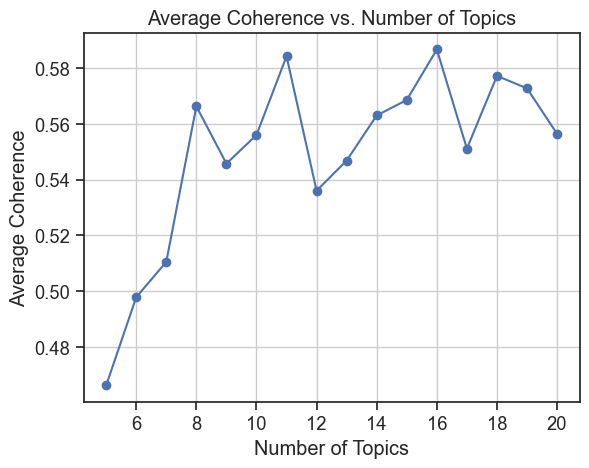

In [98]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt
import tomotopy as tp

def plot_average_coherence(data, start=5, end=20, step=1):
    coherence_scores = []
    num_topics_range = range(start, end+1, step)
    
    for num_topics in num_topics_range:
        model = tp.LDAModel(k=num_topics)
        for text in data:
            model.add_doc(text.strip().split())
        model.train(100)  
        coh = tp.coherence.Coherence(model, coherence='c_v')
        coherence_scores.append(coh.get_score())

    plt.plot(num_topics_range, coherence_scores, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.grid(True)
    plt.show()

# Usage example
plot_average_coherence(training_data)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [99]:
topic_distributions = [list(doc.get_topic_dist()) for doc in lda_model.docs]

In [134]:
#Load topic distributions
topic_distributions[30]

[0.004358961,
 0.0032761963,
 0.004540193,
 0.0037788015,
 0.002132439,
 0.0073948433,
 0.58725804,
 0.36864102,
 0.005017167,
 0.0041832025,
 0.0046354425,
 0.004783655]

In [101]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [140]:
get_top_docs(titles, topic_distributions, topic_index=6, n=3)

### ✨Topic 6✨

great thank america today president honor day tonight maga new



---


✨  
**Topic Probability**: 0.938485324382782  
**Document**: @realDonaldTrump-1182683354463907840



✨  
**Topic Probability**: 0.9284670352935791  
**Document**: @realDonaldTrump-1304236585790009344



✨  
**Topic Probability**: 0.9243608713150024  
**Document**: @realDonaldTrump-1314028978806624256



In [141]:
get_top_docs(titles, topic_distributions, topic_index=8, n=3)

### ✨Topic 8✨

trump president vote court election senate democrats people house republicans



---


✨  
**Topic Probability**: 0.9427688121795654  
**Document**: @realDonaldTrump-1047465256023445504



✨  
**Topic Probability**: 0.9400970935821533  
**Document**: @realDonaldTrump-1302100420534456321



✨  
**Topic Probability**: 0.9371636509895325  
**Document**: @realDonaldTrump-938786402992578560



In [142]:
get_top_docs(titles, topic_distributions, topic_index=7, n=3)

### ✨Topic 7✨

must help federal people coronavirus government support congress bill covid



---


✨  
**Topic Probability**: 0.9553943872451782  
**Document**: SenSanders-1169748597186809856



✨  
**Topic Probability**: 0.9503295421600342  
**Document**: SenSanders-1238555185527603200



✨  
**Topic Probability**: 0.9462616443634033  
**Document**: SenSanders-1308159496968167424



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

#Q7b (words)
Topic 6: This topic seems to be associated with positive sentiments about America, gratitude, and support for President Trump. All top tweets in this topic are from @realDonaldTrump, indicating that this topic is more representative of President Trump's views and messaging.
Topic 8: This topic revolves around discussions related to Trump's presidency, elections, and political dynamics involving Democrats and Republicans. Similar to Topic 6, all top tweets in this topic are from @realDonaldTrump, suggesting that it aligns more closely with President Trump's political agenda and discourse.
Topic 7: This topic focuses on issues related to federal assistance, government support, and COVID-19 response. Interestingly, all top tweets in this topic are from @SenSanders, indicating that this topic is more representative of Senator Sanders' views and advocacy regarding these issues.

These topics likely reflect the specific areas of interest, priorities, and messaging strategies of each politician. For example, President Trump's tweets often emphasize themes of patriotism, accomplishments, and support for his administration's policies, which align with Topic 6 and Topic 8. On the other hand, Senator Sanders is known for advocating for progressive policies, social welfare, and government intervention, which are reflected in Topic 7. The dominance of one politician's tweets in these topics suggests that they are more closely associated with their respective political agendas and perspectives.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [105]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

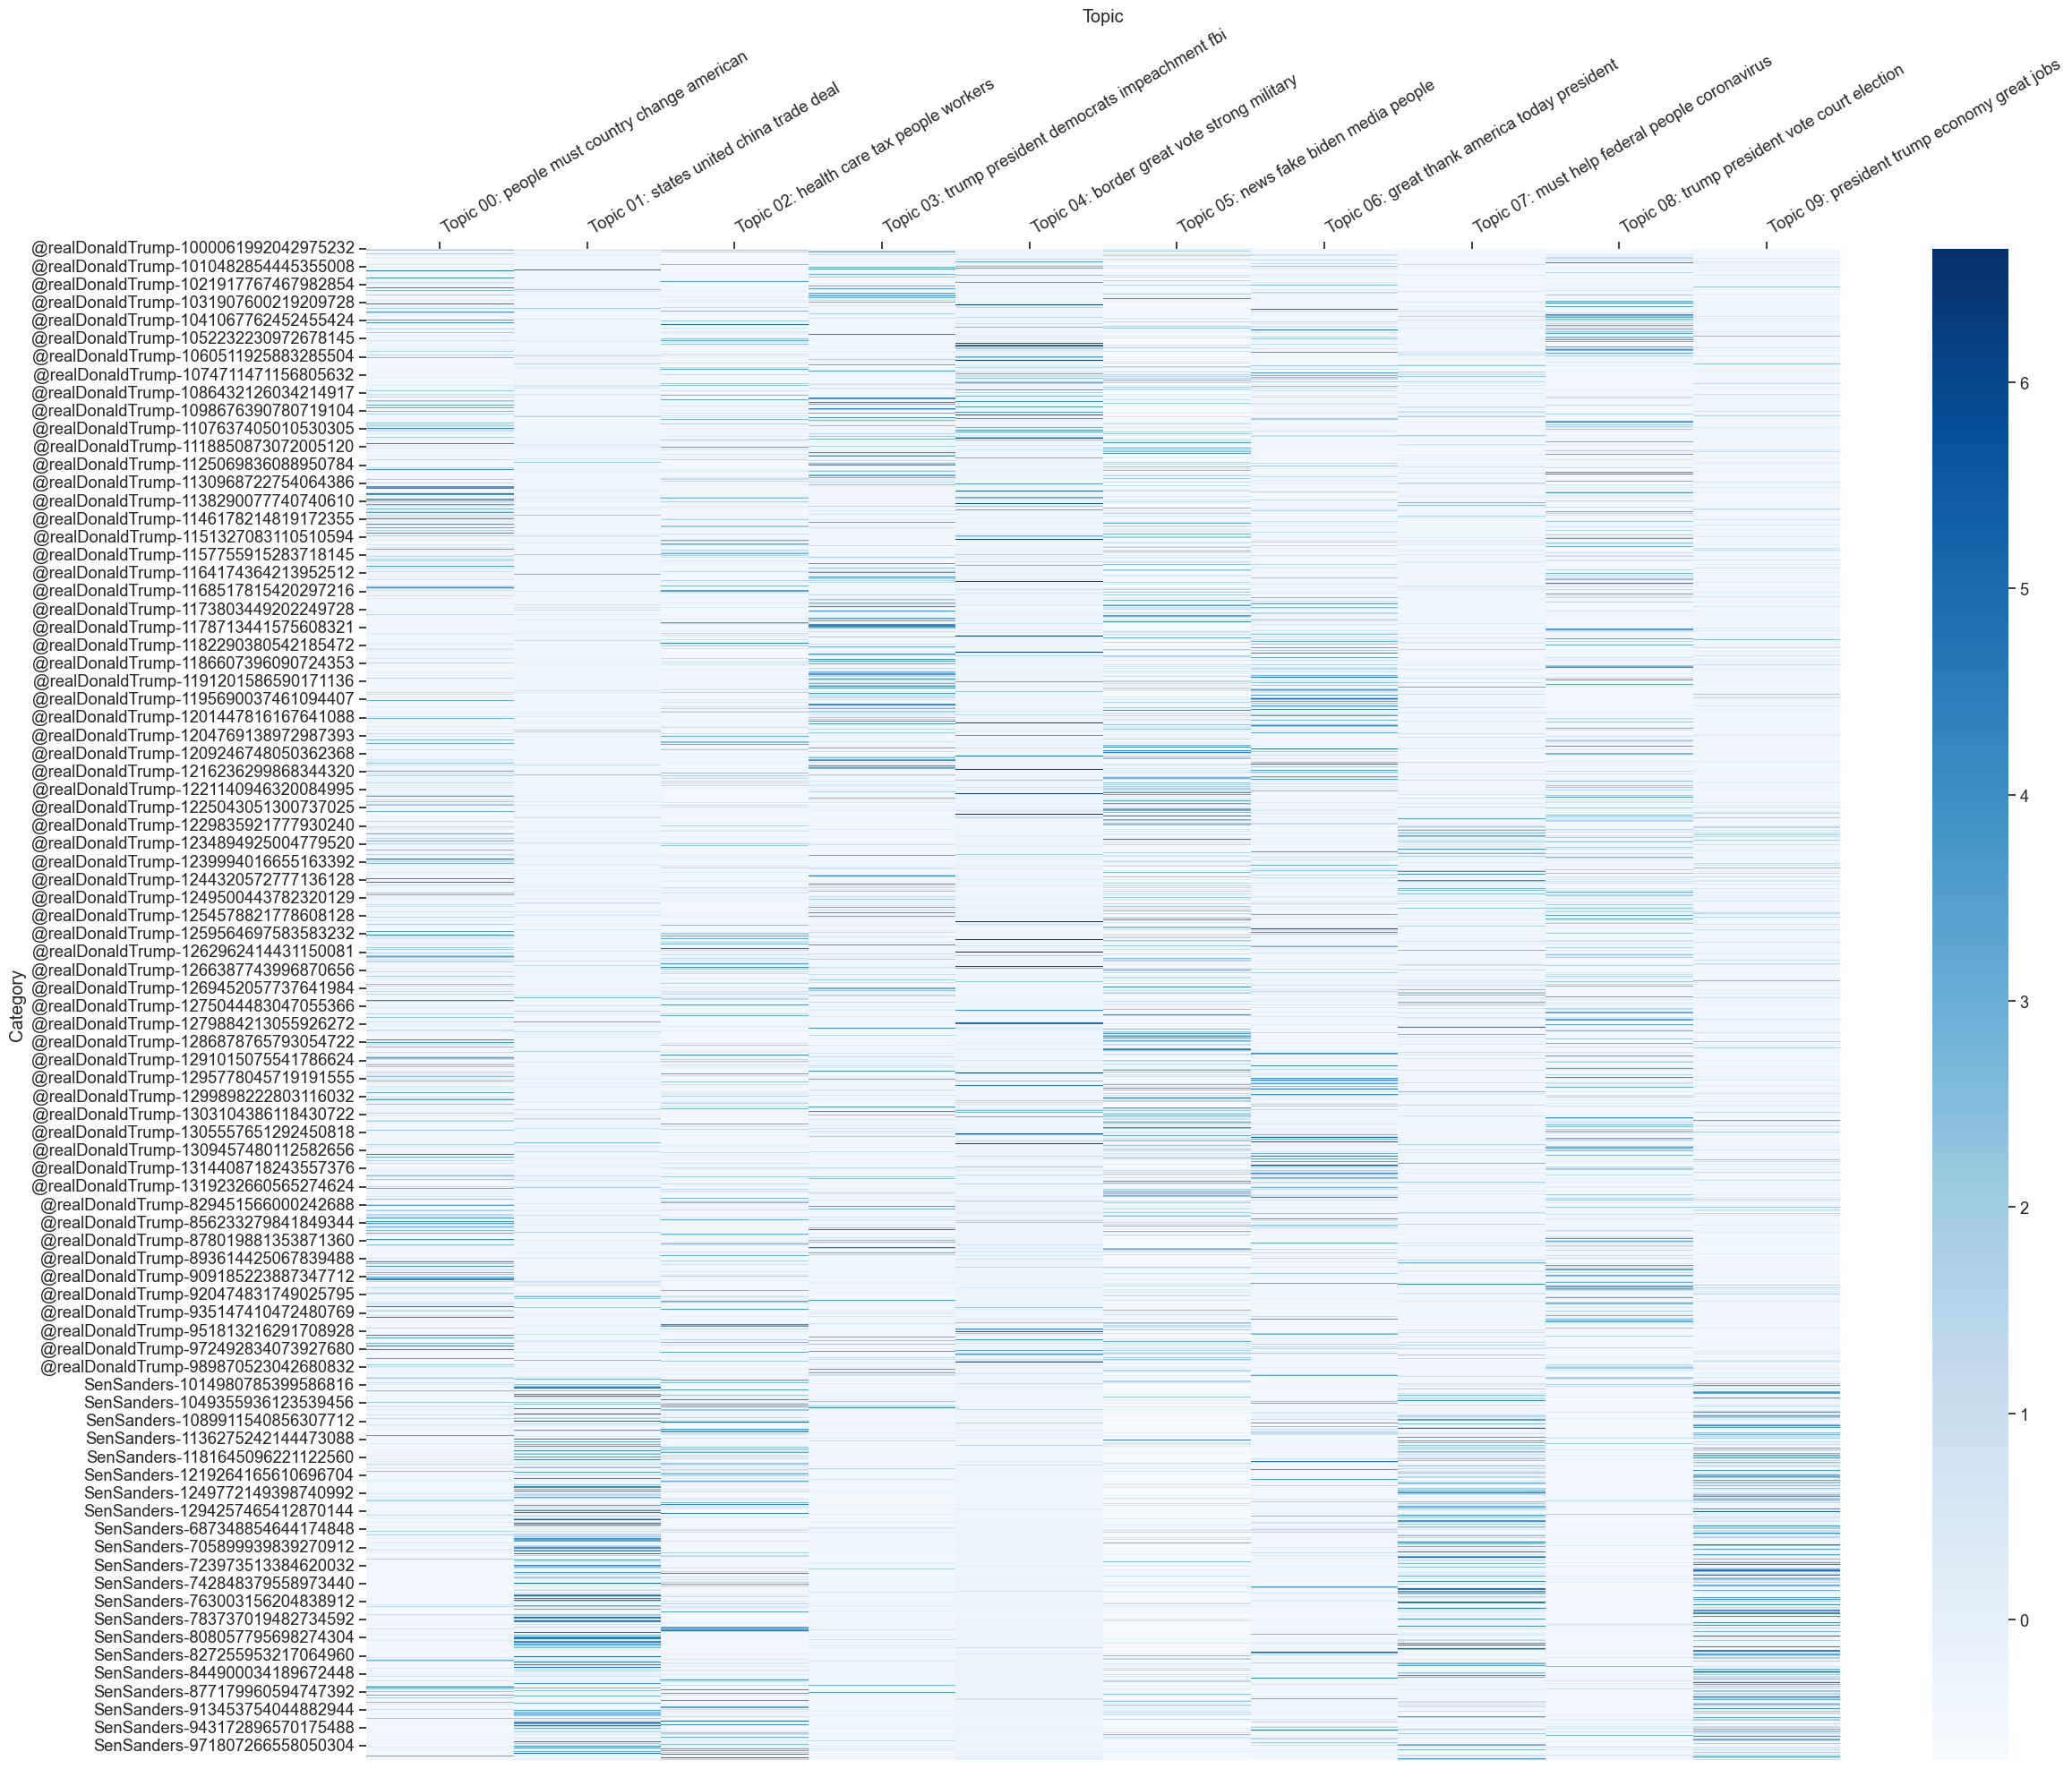

In [129]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)

def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map=sns.cm.rocket_r,
                                      dim=(25, 20)):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                if _topic_index < len(topic_keys):  # Check if topic index is within range
                    dicts_to_plot.append({'Probability': float(_probability),
                                          'Category': _label,
                                          'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# Call the function to create the heatmap
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  color_map='Blues',
                                  dim=(25, 20))


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

Trump's Tweets:
Topics such as climate change (Topic 0), media coverage and political opponents (Topic 5), expressions of gratitude towards America (Topic 6), his presidency (Topic 3), and political dynamics surrounding elections and government (Topic 8) dominate Trump's tweets.
Trump often uses his platform to express opinions on contentious issues like climate change and to criticize media outlets and political opponents. He frequently emphasizes his accomplishments and expresses loyalty to his supporters and the nation. Additionally, he engages in discussions related to his presidency, ongoing political battles, and electoral strategies.

Sanders' Tweets:
Sanders' tweets are more focused on topics such as trade deals and international relations (Topic 1), healthcare and taxation (Topic 2), government assistance and support (Topic 7), and the economy and job creation (Topic 9).
Sanders tends to prioritize issues related to economic inequality, healthcare access, and social welfare programs. He often advocates for policies aimed at improving the lives of working-class Americans, addressing income disparities, and reforming government systems to provide better support for the marginalized communities.

Overall, these patterns in the topics and themes of their tweets reflect the distinct political ideologies, priorities, and communication strategies of each politician. Trump's tweets often center around asserting his leadership, challenging opponents, and shaping public perception, while Sanders' tweets primarily focus on policy advocacy, social justice, and economic reform.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [143]:
# X2 (code)

# Separate tweets by each candidate
Trump_tweets = [title for title in titles if 'Trump' in title]
Sanders_tweets = [title for title in titles if 'Sanders' in title]

# Sample 50 tweets from each candidate's tweets
Trump_sample = sample(Trump_tweets, 50)
Sanders_sample = sample(Sanders_tweets, 50)

# Combine the samples
balanced_sample = Trump_sample + Sanders_sample

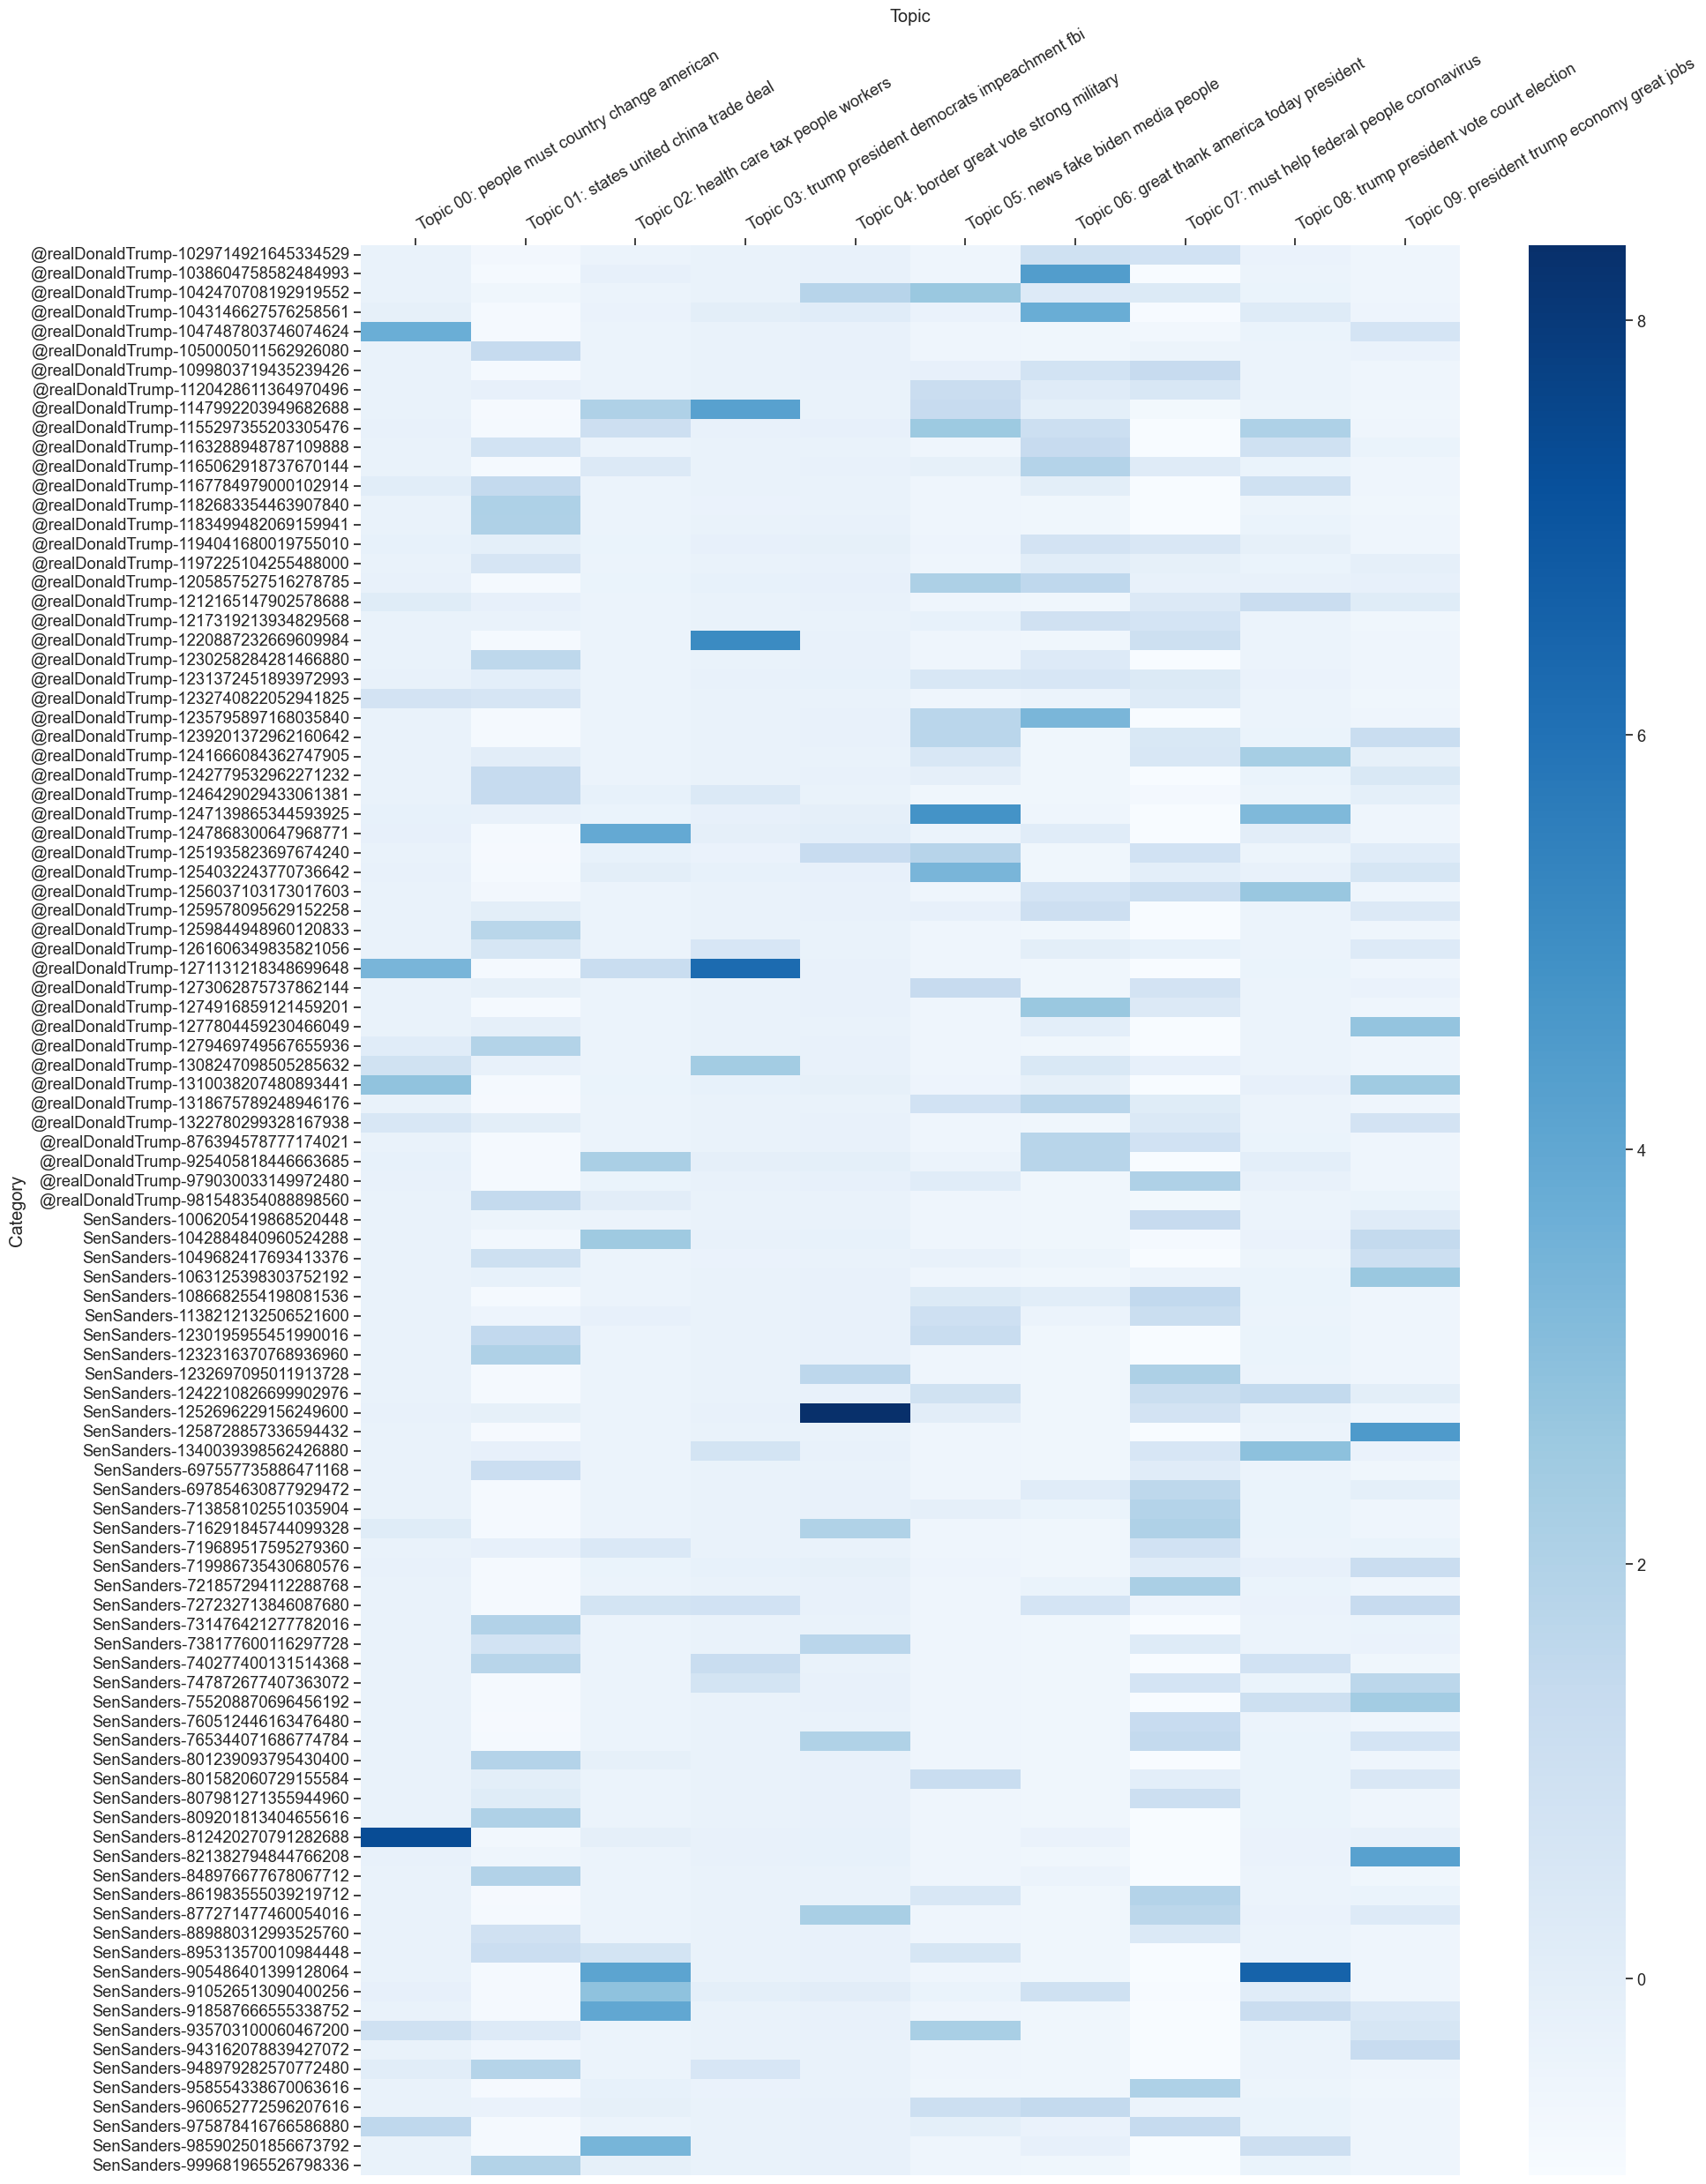

In [144]:
# Call the function to plot the heatmap with the balanced sample
plot_categories_by_topics_heatmap(balanced_sample,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=balanced_sample,
                                  color_map='Blues',
                                  dim=(20, 25))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.